# PCA and Cluster Analysis
## TMDB 5000 Movie Dataset

In this example, we do a quick example of how we could group different movies from the movie dataset provided in [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

I just want to demonstrate how PCA could influence clustering, so I will run through any problem that the dataset may pose (i.e. null values). For some background reading, you can always go to Wikipedia if the scikit learn documentation is not enough:
- [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)
- [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

Let's load the data first. You can get it from [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

In [21]:
data = pd.read_csv('tmdb_5000_movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


We now drop all the fields that might not be very relevant for our analysis (i.e. everything that is not a number). One thing I would note is that some of the fields, such as genres, could be split into a series of variables and included in the analysis. But as I mention above, I will keep it short and simple here.

In [22]:
data = data.drop(['genres','homepage','keywords','original_title','overview','production_companies','release_date','original_language','production_countries','spoken_languages','status','tagline','title'], axis=1)

In [26]:
data = data.set_index('id')
data.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
id,,,,,,
19995,237000000,150.437577,2787965087,162.0,7.2,11800
285,300000000,139.082615,961000000,169.0,6.9,4500
206647,245000000,107.376788,880674609,148.0,6.3,4466
49026,250000000,112.312950,1084939099,165.0,7.6,9106
49529,260000000,43.926995,284139100,132.0,6.1,2124


In [27]:
data.columns

Index([u'budget', u'popularity', u'revenue', u'runtime', u'vote_average',
       u'vote_count'],
      dtype='object')

I drop the rows with NaN values for simplicity. There are alternatives to this, such as setting the values to the average or to zero.

In [32]:
data = data.dropna()

In [33]:
X = data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average','vote_count']].values

In [34]:
X.shape

(4801, 6)

The next pre-processing step is to scale our data. This has to be carried out because the range of the popularity values may be quite different from the range of the budget. By "normalizing" our data, we make it simpler for our algorithms to work.

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

A first look at the data (only two of the features) reveals that there might not be obvious clusters.

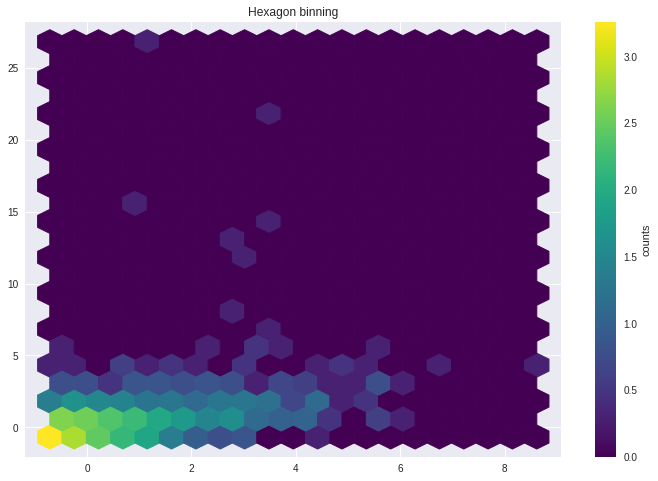

In [92]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
hb = ax.hexbin(X_scaled[:,0], X_scaled[:,1], gridsize=20, bins='log', cmap='viridis')
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

We can visualize our data (scaled or not) to identify relevant groupings.

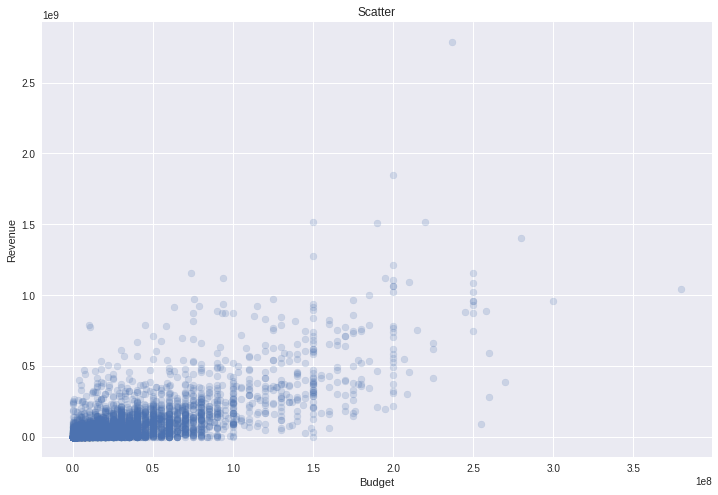

In [56]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.scatter(X[:,0], X[:,2], alpha=0.2)
plt.xlabel('Budget')
plt.ylabel('Revenue')
#ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Scatter")


## PCA

In order to carry out PCA, we would like to know how many components we should keep. We will do this by looking at the contribution to the variance of each of the components (explained variance ratio).

In [96]:
from sklearn.decomposition import PCA 
pca = PCA()
pca_dec = pca.fit(X_scaled)

In [109]:
print range(np.size(pca_dec.explained_variance_ratio_))
print pca_dec.explained_variance_ratio_

[0, 1, 2, 3, 4, 5]
[ 0.54421924  0.19151867  0.11898896  0.07563049  0.04298679  0.02665585]


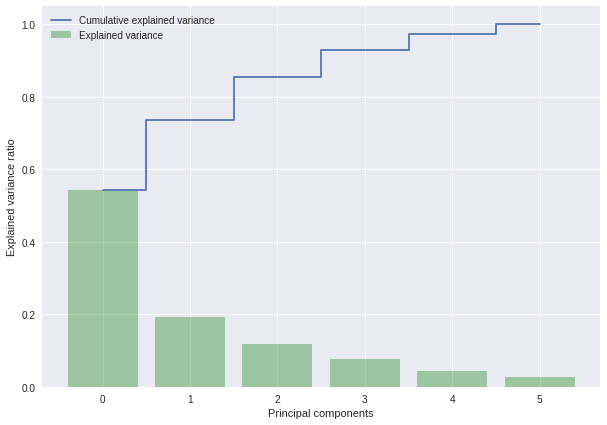

In [117]:

plt.figure(figsize=(10,7))
plt.bar(range(np.size(pca_dec.explained_variance_ratio_)),pca_dec.explained_variance_ratio_,alpha=0.3333, align='center', label='Explained variance', color = 'g')
plt.step(range(np.size(pca_dec.explained_variance_ratio_)),np.cumsum(pca_dec.explained_variance_ratio_), where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

We could now say that the first four principal components account for more than 90% of the explained variance, and we can discard the others for further analysis. I think one of the issues here is that each of these component do not have a clear meaning in relation with our system, and this may be hard to explain sometimes.

In any case, we proceed to do PCA

In [70]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=4)
x_4d = pca.fit_transform(X_scaled) 

An example of how our data would look like in two of the new dimensions.

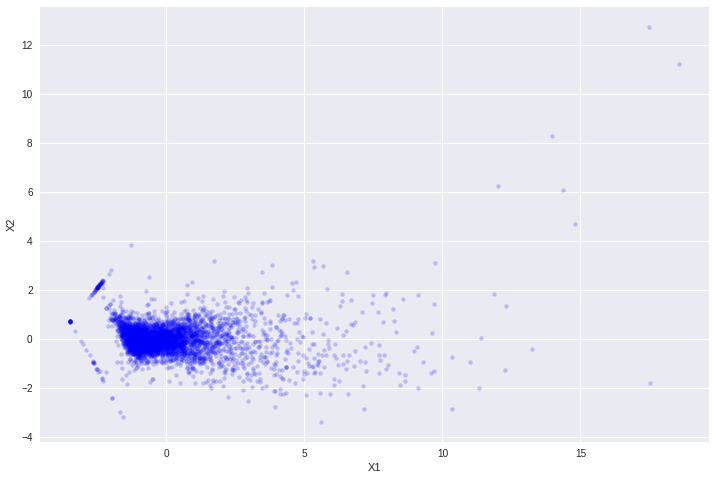

In [148]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.scatter(x_4d[:,0],x_4d[:,3], alpha=0.2, c='b',s=15.)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

At this stage, we can perform cluster analysis on the transformed data. We must choose the number of clusters, and how we do this is highly dependent on the  problem.

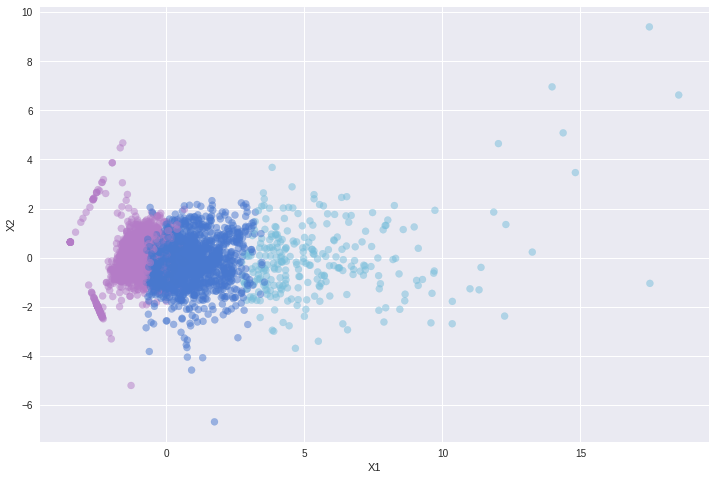

In [152]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
N=3 # How many clusters? 

kmeans = KMeans(n_clusters=N)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

# Plot the scatter digram
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.scatter(x_4d[:,0],x_4d[:,2], c= X_clustered,cmap=ListedColormap(sns.color_palette("muted").as_hex()),label = X_clustered, alpha=0.5) 
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

And this is how the cluster look like if we plot them in the original representation.

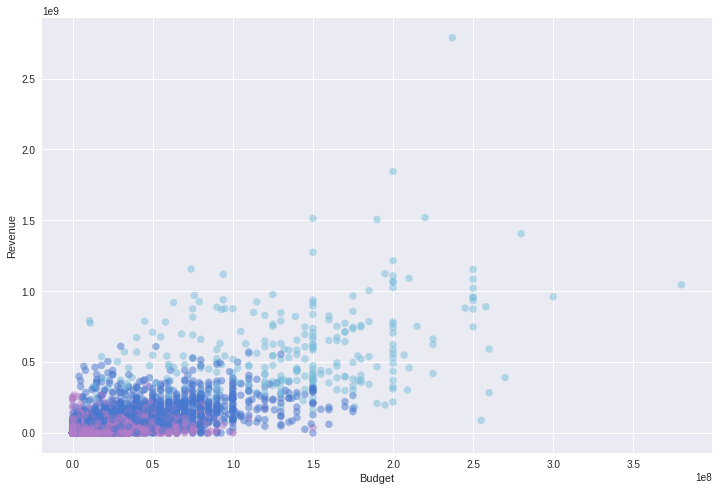

In [153]:
# Plot the scatter digram
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.scatter(X[:,0], X[:,2], c= X_clustered,cmap=ListedColormap(sns.color_palette("muted").as_hex()), alpha=0.5) 
plt.xlabel('Budget')
plt.ylabel('Revenue')

Please note that the matrix X_clustered is what we use to determine which cluster contains each of the points in the original matrix.

In [157]:
X_clustered[0:100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0], dtype=int32)